## **Introduction**

### Objective:-
> Predicting the quality of wine based on chemical attributes


### Input variables:
   
1. fixed acidity :
> a measurement of the total concentration of titratable acids and free hydrogen ions present in  the wine.Theoretically,having a low acidity will result in a flat and boring wine while having too much acid can lead to tartness or even a sour wine.These acids either occur naturally in the grapes or are created through the fermentation process.

2. volatile acidity :
>a measure of steam distillable acids present in a wine. In theory,our palates are quite       sensitiveto the presence of volatile acids and for that reason a goodwine should keep their concentrations as low as possible.

3. citric acid :
>one of the many acids that are measured too btained fixed acidity.

4. residual sugar :
>measurement of any natural grape sugarsthat are leftover after fermentation ceases.In theory residual sugar can help wines age well.

5. chlorides :
>the amount of salt in the wine.

6. free sulfur dioxide :
>the free form of SO2 exists inequilibrium between molecular SO2 (as a dissolved gas)and  bisulfite ion;it prevents microbial growth and theoxidation of wine.

7. total sulfur dioxide :
>amount of free and bound forms ofSO2; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

8. density:
>measure of density of wine.

9. pH :
>value for pH.

10. sulphates :
>a wine additive which can contribute to sulfurdioxide gas(S02) levels, which acts as an antimicrobial and antioxidant.

11. alcohol :
>the percentage of alcohol present in the wine.

### Output variable:

12. quality : 1(Good) or 0(Bad)


## **Related Works**
Wine Quality dataset is a popular dataset. It has widely been used by researchers and scholars for studying supervised learning methods. <br>
It has red wine and white wine quality data. We have used red wine dataset here. <br>
The popular problem is to classify wine as whether it is red wine or white wine. This problem has been solved up to the accuracy of 99.5% with the help of Random forests method.

In [118]:
#Importing all necessary library functions
from __future__ import print_function
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score,classification_report, plot_confusion_matrix

In [97]:
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Observation:-
1. Some wines are really weak i.e. alcohol<10.
2. Some wines are really salty i.e chlorides >0.06.
3. the fermentation is not over for some wines i.e density >1.
4. Some wines are much more acidic than others as mean is 3.31 and max is 4.01
5. Some wines are really sweet i.e residual sugar > 4.5

In [99]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

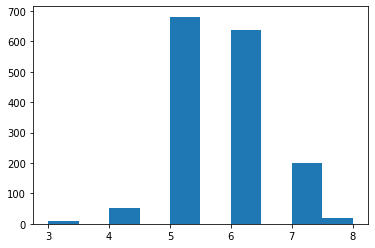

In [100]:
plt.hist(data['quality'])
plt.show()

### Observation:-
1. Most of the wines are rated between 5 and 7

(12.0, 0.0)

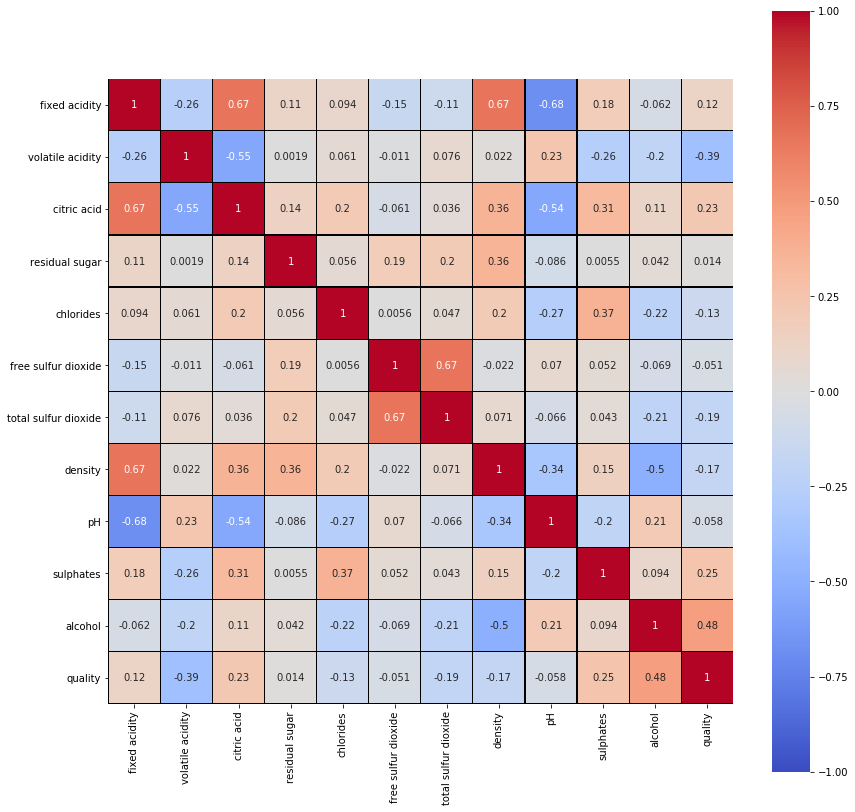

In [101]:
# correlation matrix
plt.figure(figsize=(14,14))

mp=sns.heatmap(data.corr(), annot = True,cmap='coolwarm',
            vmin=-1, vmax=1, center=0,linewidths=0.2,linecolor='black',
            cbar=True,square=True)
bottom, top = mp.get_ylim()
mp.set_ylim(bottom + 0.5, top - 0.5)

## Observations:-

1. The wine quality is highly correlated to the alcohol and the volatile acidity.
2. quality and alcohol are positively correlated.
3. volatile acidity and quality are negatively correlated.

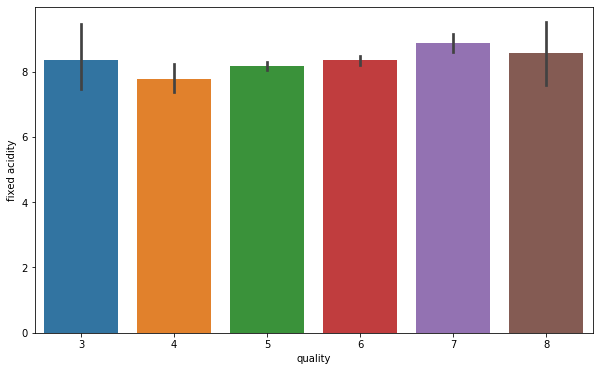

In [102]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data);

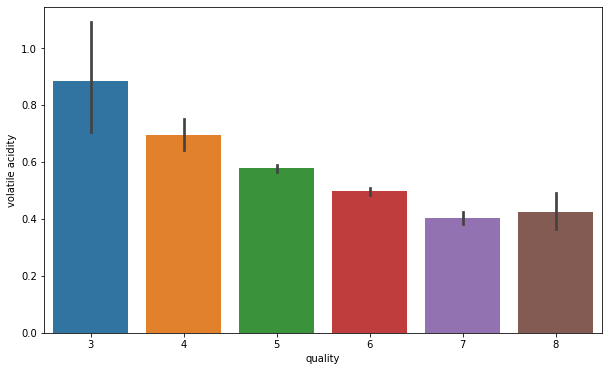

In [103]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data);

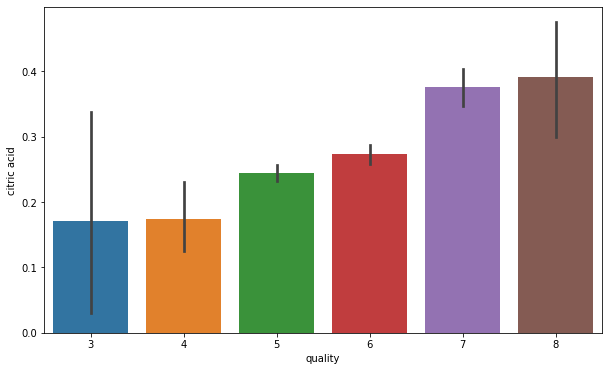

In [104]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data);

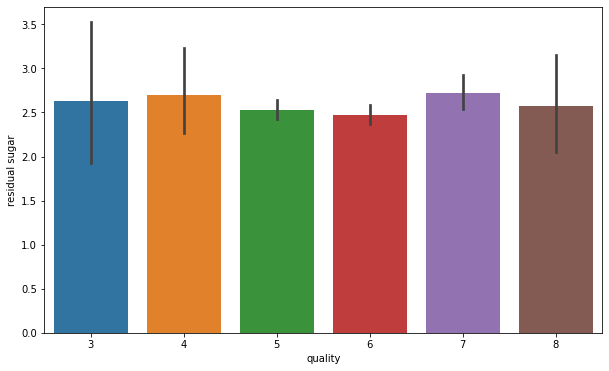

In [105]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data);

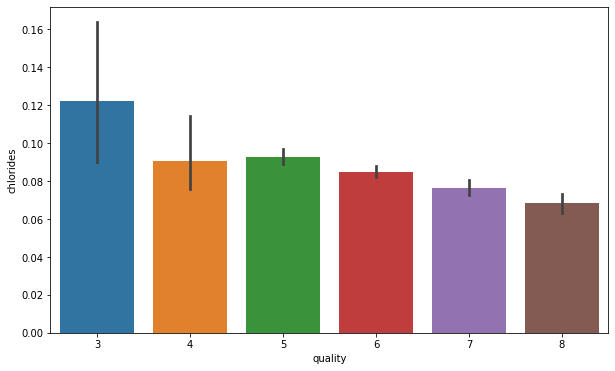

In [106]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data);

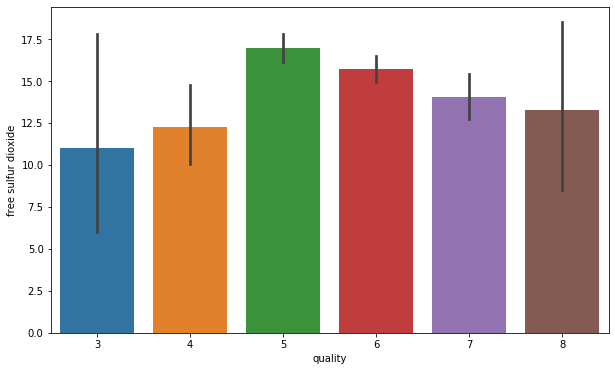

In [107]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data);

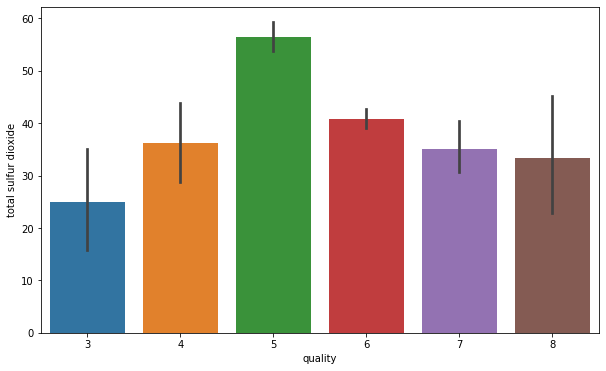

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

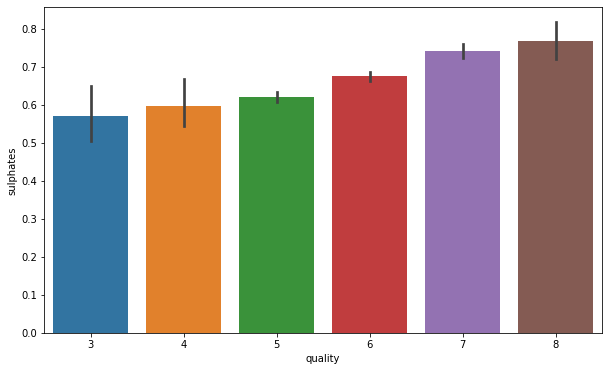

In [108]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data);

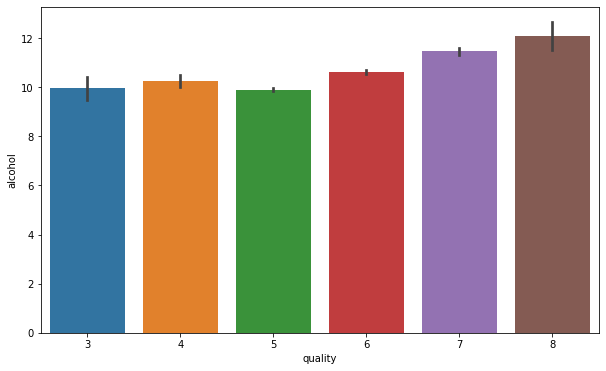

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

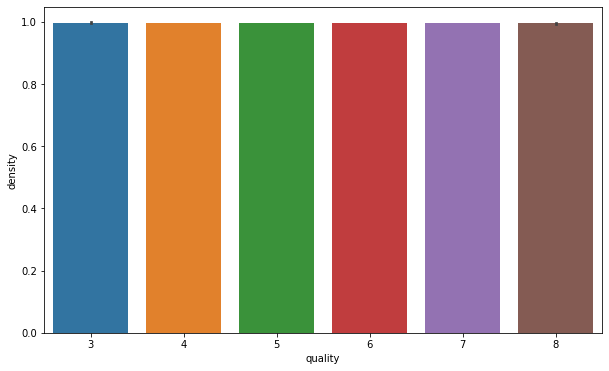

In [109]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = data);

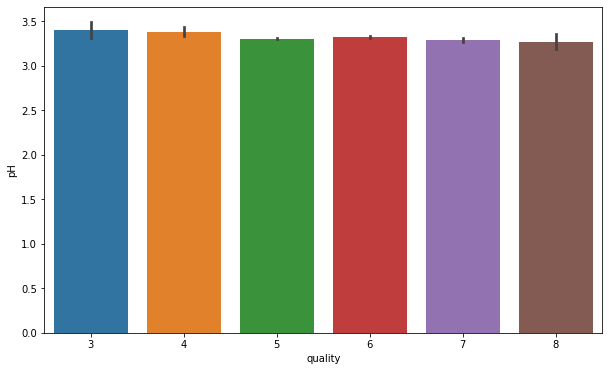

In [110]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = data);

In [112]:
reviews = []
for i in data['quality']:
    if i <= 5:
        reviews.append('1')
#     elif i >= 4 and i <= 7:
#         reviews.append('2')
    else:
        reviews.append('2')
data['Reviews'] = reviews

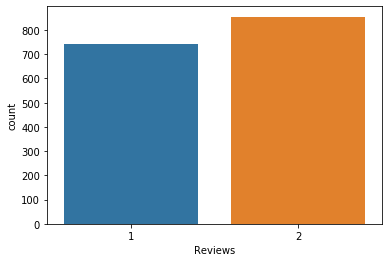

In [113]:
sns.countplot(data['Reviews']);

In [116]:
data['Reviews'].value_counts()

2    855
1    744
Name: Reviews, dtype: int64

**Here we have converted a 10 class dataset into 2 class dataset, because it was a biased dataset.**

**Converting it into two classes which do nto have much difference to create a bias.**

In [23]:
x = data.iloc[:,:10]
y = data['Reviews']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [117]:
#Code for plotting classification report in form of a heatmap

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1line.set_visible = False
        t.tick2line.set_visible = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1line.set_visible = False
        t.tick2line.set_visible = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 1)]:
        t = line.strip().split()
        s=len(t)
        if s < 4: continue
        r=1
        if s>5:
            r=2
        classes.append(t[0]+t[1])
        v = [float(x) for x in t[r: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        #print(v)
        plotMat.append(v)

    #print('plotMat: {0}'.format(plotMat))
    #print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

## **Methodology**
1. The dataset was previously biased dataset hence classification could not have been accurate. 
2. We then divided the dataset into two classes to make it balanced or unbiased.
3. We used 4 models to test the accuracy over the test set and compared their classification report to find the more suitable model.
4. We plotted a confusion matrix and classification report(as heatmaps).
5. We then plotted the bar plots for each of the following parameter comparing all the models:<br>
    *Training Accuracy*<br>
    *Test Accuracy*<br>
    *F1- Score*<br>
    *Recall* <br>
    *Precision Score*
6. Following algorithms are used for classification task:<br>
    *Decision Tree*<br>
    *Random Forest*<br>
    *Random Gradient Boost*<br>
    *Support Vector Machine*

## **Decision Tree Classifier**

Acuracy : 68.4375
              precision    recall  f1-score   support

           1       0.69      0.65      0.67       156
           2       0.68      0.72      0.70       164

    accuracy                           0.68       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.68      0.68      0.68       320

Confusion Matrix


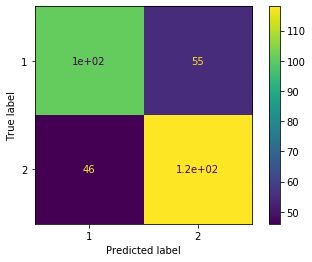

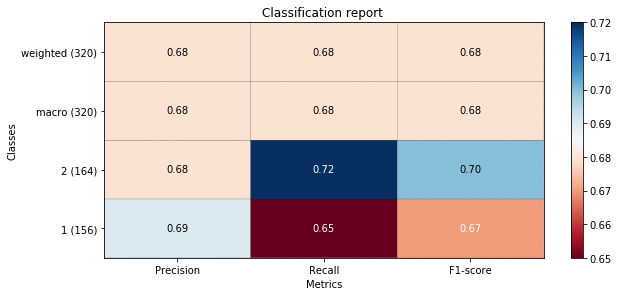

In [68]:
#Decision Tree classifier training and performance evaluation

dt = DecisionTreeClassifier(random_state=73)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
#print confusion matrix and accuracy score
dt_acc_score = accuracy_score(y_test, dt_predict)
print("Acuracy :", dt_acc_score*100)
plot_confusion_matrix(dt,x_test,y_test)
print(classification_report(y_test, dt_predict))
print("Confusion Matrix")
plot_classification_report(classification_report(y_test, dt_predict))

## **Random Forest Classifier**

Acuracy : 78.125
              precision    recall  f1-score   support

           1       0.78      0.76      0.77       156
           2       0.78      0.80      0.79       164

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

Confusion Matrix


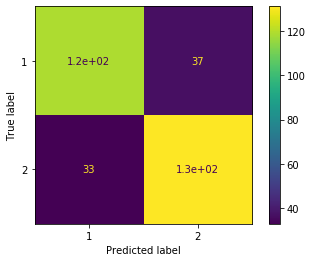

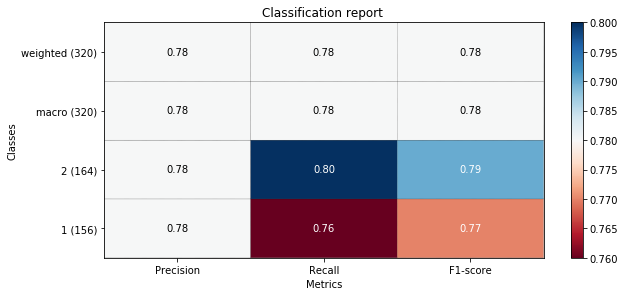

In [120]:
#Random forest classifier for training and performance evaluation

dt = RandomForestClassifier(random_state=73,n_jobs=-1)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
#print confusion matrix and accuracy score
dt_acc_score = accuracy_score(y_test, dt_predict)
print("Acuracy :", dt_acc_score*100)
plot_confusion_matrix(dt,x_test,y_test)
print(classification_report(y_test, dt_predict))
print("Confusion Matrix")
plot_classification_report(classification_report(y_test, dt_predict))

## **Gradient Boosting**

Acuracy : 74.0625
              precision    recall  f1-score   support

           1       0.76      0.69      0.72       156
           2       0.73      0.79      0.76       164

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion Matrix


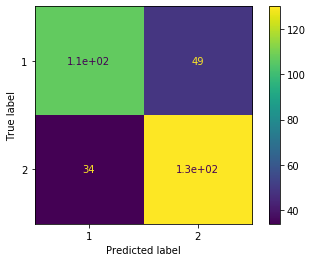

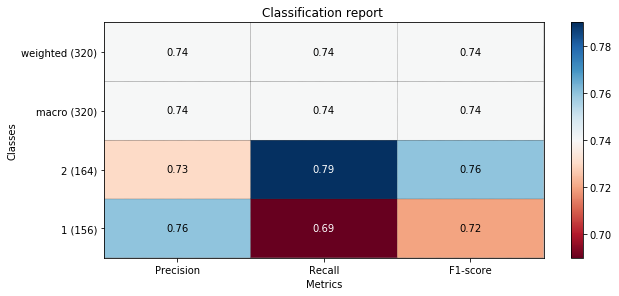

In [121]:
#Gradient boosting classifier

dt = GradientBoostingClassifier(random_state=73)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
#print confusion matrix and accuracy score
dt_acc_score = accuracy_score(y_test, dt_predict)
print("Acuracy :", dt_acc_score*100)
plot_confusion_matrix(dt,x_test,y_test)
print(classification_report(y_test, dt_predict))
print("Confusion Matrix")
plot_classification_report(classification_report(y_test, dt_predict))

## **Support Vector Machine**

Acuracy : 62.18749999999999
              precision    recall  f1-score   support

           1       0.76      0.69      0.72       156
           2       0.73      0.79      0.76       164

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion Matrix


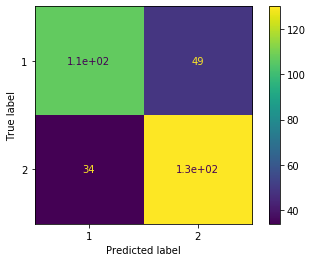

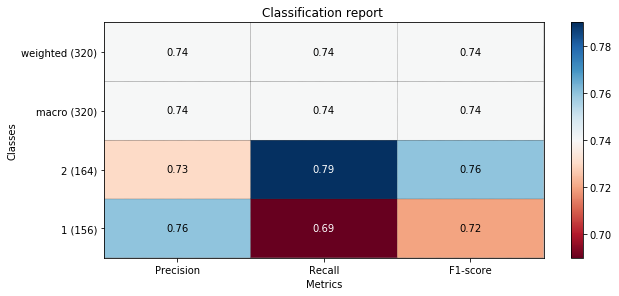

In [122]:
#SVM classifier 

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
dt_acc_score = accuracy_score(y_test, pred_svc)
print("Acuracy :", dt_acc_score*100)
plot_confusion_matrix(dt,x_test,y_test)
print(classification_report(y_test, dt_predict))
print("Confusion Matrix")
plot_classification_report(classification_report(y_test, dt_predict))

## **SVM with GridSearchCV**

In [76]:
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [77]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.1, 'kernel': 'linear'}

Acuracy : 67.5
              precision    recall  f1-score   support

           1       0.69      0.65      0.67       156
           2       0.68      0.72      0.70       164

    accuracy                           0.68       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.68      0.68      0.68       320

Confusion Matrix


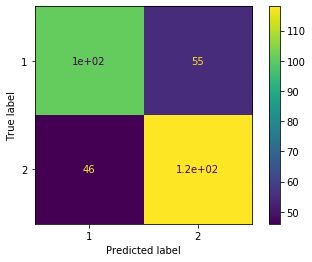

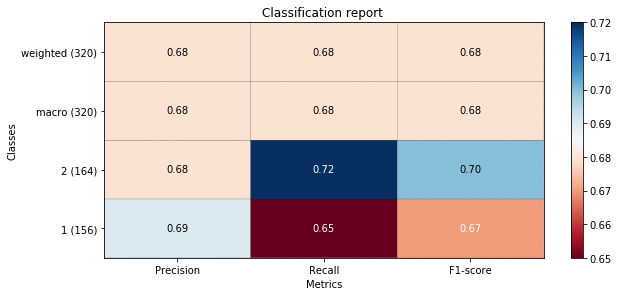

In [75]:
svc2 = SVC(C = 1.4, gamma =  0.1, kernel= 'linear')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
dt_acc_score = accuracy_score(y_test, pred_svc2)
print("Acuracy :", dt_acc_score*100)
plot_confusion_matrix(dt,x_test,y_test)
print(classification_report(y_test, dt_predict))
print("Confusion Matrix")
plot_classification_report(classification_report(y_test, dt_predict))

## **Comaprison of performances of all the models used**

In [79]:
#List of all the models
classifier =[ DecisionTreeClassifier(random_state=73),
            RandomForestClassifier(random_state=73,n_jobs=-1),
            GradientBoostingClassifier(random_state=73),
            SVC(C = 1.4, gamma =  0.1, kernel= 'linear')]

In [80]:
classifier_columns = []
classifier_compare = pd.DataFrame(columns = classifier_columns)

In [123]:
# Evaluation of model based on various parameters
# Generate the values for those parameters for respective models
row_index = 0
for i in classifier:
    y_pred = i.fit(x_train, y_train).predict(x_test)
    new_y=[int(j) for j in y_pred]
    #fp, tp, th = roc_curve(y_test, new_y,pos_label=1,sample_weight=None)
    #print(tp)
    classifier_name = i.__class__.__name__
    classifier_compare.loc[row_index,'Classifier Name'] = classifier_name
    classifier_compare.loc[row_index, 'Classifier Train Accuracy'] = round(i.score(x_train, y_train), 4)
    classifier_compare.loc[row_index, 'Classifier Test Accuracy'] = round(i.score(x_test, y_test), 4)
    classifier_compare.loc[row_index, 'Classifier Precission'] = precision_score(y_test, y_pred,average='weighted')
    classifier_compare.loc[row_index, 'Classifier Recall'] = recall_score(y_test, y_pred,average='weighted')
    classifier_compare.loc[row_index, 'Classifier F1 score'] = f1_score(y_test, y_pred,average='weighted')
    #classifier_compare.loc[row_index, 'Classifier AUC'] = auc(fp, tp)
    row_index+=1
    
#Print the values in the order of accuracy score
classifier_compare.sort_values(by = ['Classifier Test Accuracy'], ascending = False, inplace = True)    
classifier_compare

,Classifier Name,Classifier Train Accuracy,Classifier Test Accuracy,Classifier Precission,Classifier Recall,Classifier F1 score,Classifier AUC
1,RandomForestClassifier,1.0000,0.7812,0.781289,0.781250,0.781147,NaN
2,GradientBoostingClassifier,0.8632,0.7406,0.742154,0.740625,0.739747,NaN
0,DecisionTreeClassifier,1.0000,0.6844,0.684515,0.684375,0.683902,NaN
3,SVC,0.7138,0.6750,0.679848,0.675000,0.671330,NaN


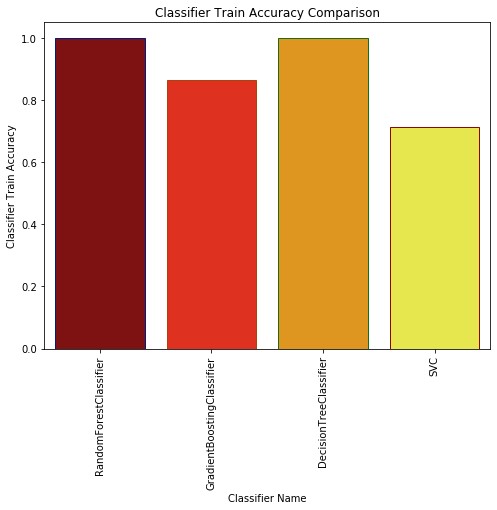

In [125]:
#Comparison based on Train accuracy
plt.subplots(figsize=(8,6))
sns.barplot(x="Classifier Name", y="Classifier Train Accuracy",data=classifier_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Train Accuracy Comparison')
plt.show()

#### **Order based on Train Accuracy-score:**

**Random Forest >=  Decision Tree > RGB > SVC**

*The decision tree and random forest can have high variance(overfitting) and hence it contributes in very high train accuracy*

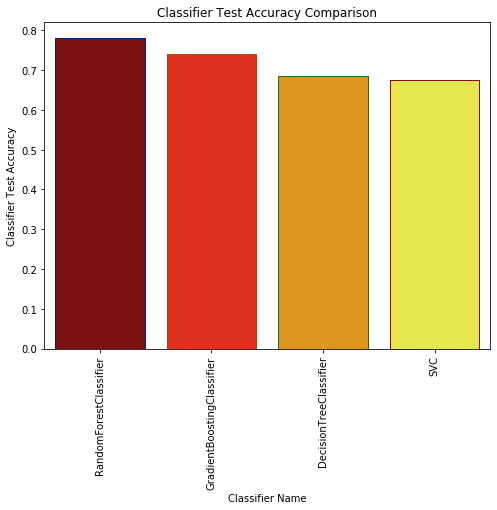

In [126]:
#Comparison based on Test accuracy
plt.subplots(figsize=(8,6))
sns.barplot(x="Classifier Name", y="Classifier Test Accuracy",data=classifier_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Test Accuracy Comparison')
plt.show()

#### **Order based on Test Accuracy-score:**
**Random Forest > RGB > Decision Tree > SVC**

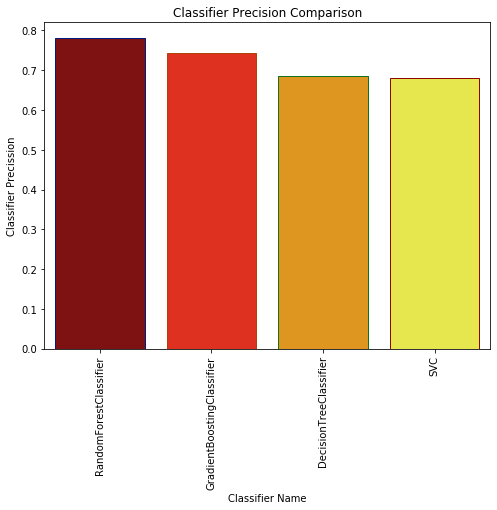

In [130]:
#Comparison based on Precision 
plt.subplots(figsize=(8,6))
sns.barplot(x="Classifier Name", y="Classifier Precission",data=classifier_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Precision Comparison')
plt.show()

#### **Order based on Precision:**
**Random Forest > RGB > Decision Tree > SVC**

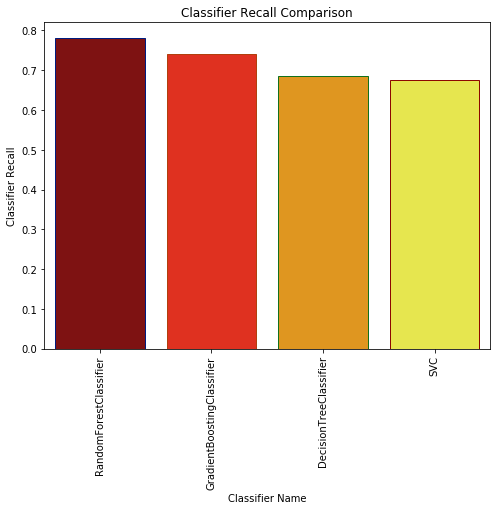

In [128]:
#Comparison based on Recall
plt.subplots(figsize=(8,6))
sns.barplot(x="Classifier Name", y="Classifier Recall",data=classifier_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Recall Comparison')
plt.show()

#### **Order based on Recall-score:**
**Random Forest > RGB > Decision Tree > SVC**

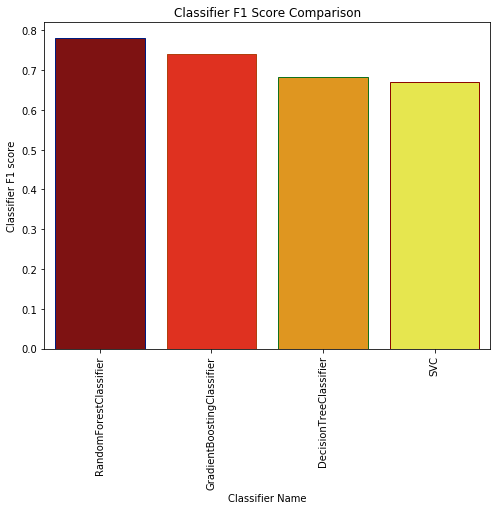

In [91]:
#Comparison based on F1-score
plt.subplots(figsize=(8,6))
sns.barplot(x="Classifier Name", y="Classifier F1 score",data=classifier_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier F1 Score Comparison')
plt.show()

#### **Order based on F1-score:**
**Random Forest > RGB > Decision Tree > SVC**

## **Results & Discussion**

**Behaviour of Random Forest**
Random Forest classifier has been the best model for wine quality prediction. Random forests use bootstrap aggregating(bagging) technique to train the model over the training set.

A single decision tree may have higher variance(overfitting) but in a random forest, multiple trees are generated. Polling is done to find the most probable answer. Though dataset has low dimensionality, random forests are helpful for high dimensional datasets.


**Behaviour of SVM**
SVM performs better when the margin of separation is higher. Here, the margin is low and not easy to distinguish in two classes.
SVM is more effective in high dimensional space. In give dataset, there are lesser attributes. Also, there is no probabilistic explanation for its behaviour.

**Behaviour of Decision Tree**
Decision tree here overfits the training set and hence gives 100% training accuracy. Since it overfits, it always has performed worse than RGB or random forests though it performs better than SVC.

**Behaviour of RGB**
RGB performs better than decision tree and SVC but not as that of a random forest. This can be attributed to its parameters and overfitting of the model.


## **Summary**

**Four of the popular supervised learning models were used to predict the quality of the wine. <br>
The initial dataset was highly biased because it had a majority of samples belonging to three classes only. <br>
We converted it into a two-class dataset and applied classification techniques to build a precise model. We achieved a test accuracy of nearly 78% with Random forests, which was highest among all the used models.**